In [5]:
import pandas as pd
from scipy.stats import entropy
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
TRAIN_LIST = ['LC-QuAD',
                'QALD',
                'CogComp',
                'WebQuestions',
                'SimpleQuestions',
                'LC-QuAD+QALD',
                'LC-QuAD+CogComp',
                'LC-QuAD+WebQuestions',
                'LC-QuAD+SimpleQuestions',
                'QALD+CogComp',
                'QALD+WebQuestions',
                'QALD+SimpleQuestions',
                'CogComp+WebQuestions',
                'CogComp+SimpleQuestions',
                'WebQuestions+SimpleQuestions',
                'LC-QuAD+QALD+CogComp',
                'LC-QuAD+QALD+WebQuestions',
                'LC-QuAD+QALD+SimpleQuestions',
                'LC-QuAD+CogComp+WebQuestions',
                'LC-QuAD+CogComp+SimpleQuestions',
                'LC-QuAD+WebQuestions+SimpleQuestions',
                'QALD+CogComp+WebQuestions',
                'QALD+CogComp+SimpleQuestions',
                'QALD+WebQuestions+SimpleQuestions',
                'CogComp+WebQuestions+SimpleQuestions',
                'LC-QuAD+QALD+CogComp+WebQuestions',
                'LC-QuAD+QALD+CogComp+SimpleQuestions',
                'LC-QuAD+QALD+WebQuestions+SimpleQuestions',
                'LC-QuAD+CogComp+WebQuestions+SimpleQuestions',
                'QALD+CogComp+WebQuestions+SimpleQuestions',
                'LC-QuAD+QALD+CogComp+WebQuestions+SimpleQuestions']

TEST_LIST = ['LC-QuAD', 'QALD', 'CogComp', 'WebQuestions', 'SimpleQuestions']

CLASS_NAMES = [
    'List',
    'Award',
    'Disease',
    'Boolean',
    'EthnicGroup',
    'Event',
    'Work',
    'TimePeriod',
    'DateTime',
    'Flag',
    'Holiday',
    'ChemicalSubstance',
    'Currency',
    'PersonFunction',
    'SportsSeason',
    'Activity',
    'Medicine',
    'Species',
    'Altitude',
    'Colour',
    'Device',
    'Language',
    'Number',
    'MeanOfTransportation',
    'Food',
    'TopicalConcept',
    'AnatomicalStructure',
    'Agent',
    'Place',
    'String'
]

In [10]:
def get_distributions(dataset):
    ds_dict = {key: 0.0000000000000001 for key in CLASS_NAMES}

    for cls in CLASS_NAMES:
        if cls in dataset.type.unique():
            cls_prob = dataset[dataset.type == cls].shape[0]/dataset.shape[0]
            ds_dict[cls] = cls_prob

    return ds_dict

In [12]:
train_distributions, test_distributions = list(), list()

for train in TRAIN_LIST:
    df = pd.read_csv(f"../../data/UnifiedSubclassDBpedia/{train}-train.csv", sep=';')
    train_distributions.append(get_distributions(df))

for test in TEST_LIST:
    df = pd.read_csv(f"../../data/UnifiedSubclassDBpedia/{test}-test.csv", sep=';')
    test_distributions.append(get_distributions(df))

In [17]:
matrix = list()
for i in range(len(train_distributions)):
    # print('>>>', dataset_names[i])
    row = list()
    for j in range(len(test_distributions)):
        q, p = list(train_distributions[i].values()), list(test_distributions[j].values())
        kl_div = entropy(pk=p, qk=q)
        row.append(kl_div)
        # print('-', dataset_names[j], '=', kl_div)
    matrix.append(row)

In [1]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["font.size"] = 12

ax = sns.heatmap(
    np.array(matrix),
    linewidths=1,
    annot=True,
    xticklabels=TEST_LIST,
    yticklabels=TRAIN_LIST,
    cmap="Greys"
)

plt.show()

NameError: name 'plt' is not defined

In [19]:
train, test, value = list(), list(), list()
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        train.append(TRAIN_LIST[i])
        test.append(TEST_LIST[j])
        value.append(matrix[i][j])

In [22]:
kld_df = pd.DataFrame.from_dict({'train': train, 'test': test, 'value': value})

In [23]:
kld_df.to_csv("../../data/KL-divergence/kld.csv", index=False, sep=';')

In [54]:
bert = pd.read_csv("../../data/KL-divergence/bert.csv")
bert = bert['F1 Score'].apply(lambda x: x.replace(',', '.')).astype(float).values[:-1]

roberta = pd.read_csv("../../data/KL-divergence/roberta.csv")
roberta = roberta['F1 Score'].apply(lambda x: x.replace(',', '.')).astype(float).values[:-1]

distilbert = pd.read_csv("../../data/KL-divergence/distilbert.csv")
distilbert = distilbert['F1 Score'].apply(lambda x: x.replace(',', '.')).astype(float).values[:-1]

kld = pd.read_csv("../../data/KL-divergence/kld-sorted.csv")
kld = kld['value'].apply(lambda x: x.replace(',', '.')).astype(float)

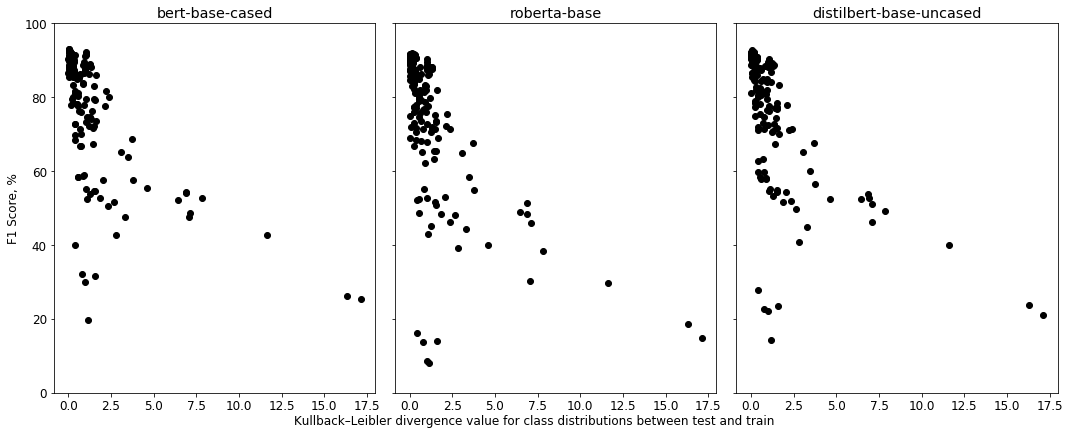

In [67]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)
fig.text(
    0.5,
    0.004,
    'Kullback–Leibler divergence value for class distributions of test and train',
    ha='center'
)

x = kld
y1 = bert*100
y2 = roberta*100
y3 = distilbert*100

axs[0].set_title("bert-base-cased")
axs[0].plot(x, y1, 'o', color='black')
axs[0].set_ylabel('F1 Score, %')
axs[0].set_ylim([0, 100])

axs[1].set_title("roberta-base")
axs[1].plot(x, y2, 'o', color='black')

axs[2].set_title("distilbert-base-uncased")
axs[2].plot(x, y3, 'o', color='black')

plt.tight_layout()